In [1]:
import pandas as pd
from collections import defaultdict
import numpy as np

import matplotlib.pyplot as plt

In [96]:
%matplotlib inline

In [97]:
classes_df = pd.read_csv("./configs/_base_/class_mapping/universal_classes.csv", sep=";")
CLASSES= {}
for key, value in zip(classes_df["class_id"], classes_df["class_name"]):
    CLASSES[key] = value

In [98]:
print(CLASSES)

{0: 'ignore', 1: 'car', 2: 'bicycle', 3: 'bus', 4: 'truck', 5: 'train', 6: 'caravan', 7: 'trailer', 8: 'motorcycle', 9: 'ego_vehicle', 10: 'wheeled_slow', 11: 'boat', 12: 'other-vehicles', 13: 'road', 14: 'sidewalk', 15: 'parking', 16: 'rail_track', 17: 'pedestrian_area', 18: 'crosswalk_plain', 19: 'bike_lane', 20: 'service_lane', 21: 'curb', 22: 'general_marking', 23: 'zebra_marking', 24: 'snow', 25: 'water', 26: 'sand', 27: 'building', 28: 'fence', 29: 'wall', 30: 'bridge', 31: 'tunnel', 32: 'guard_rail', 33: 'barrier', 34: 'vegetation', 35: 'terrain', 36: 'sky', 37: 'mountain', 38: 'pole', 39: 'utility_pole', 40: 'traffic_sign', 41: 'traffic_light', 42: 'street_light', 43: 'billboard', 44: 'manhole', 45: 'banner', 46: 'trash_can', 47: 'catch_basin', 48: 'junction_box', 49: 'cctv_camera', 50: 'fire_hydrant', 51: 'bench', 52: 'mailbox', 53: 'pothole', 54: 'phone_booth', 55: 'traffic_sign_frame', 56: 'person', 57: 'motorcyclist', 58: 'bicyclist', 59: 'other_rider', 60: 'animal', 61: 'b

In [99]:
IGNORE_CLASSES_INDX = [0, 184]

In [100]:
INDOOR_CLASSES_INDX = [62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82,
                       83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103,
                       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122,
                       123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141,
                       142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160,
                       161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179,
                      183, 186, 187, 188]

### Balanced Clustering 
source: https://github.com/zhu-he/regularized-k-means

In [101]:
feat_mean_df = pd.read_csv("features_out/feat_1000.csv", sep=";")

In [102]:
print(list(feat_mean_df.columns))

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155', '156', '157', '158', '15

In [103]:
feat_mean_df

,0,1,2,3,4,5,6,7,8,9,...,181,182,183,184,185,186,187,188,189,190
0,0.002868,0.002484,0.004438,0.001830,0.000671,0.003147,0.006319,0.007599,0.002064,0.003738,...,0.001491,-0.000838,0.002832,0.003038,0.000580,-0.026139,0.002538,0.005360,0.002500,-0.002413
1,0.002900,0.002523,0.003804,0.001737,0.000431,0.003518,0.005769,0.007693,0.001182,0.003704,...,0.002618,-0.000910,0.002855,0.002902,0.000036,0.041450,0.002634,0.005332,0.002455,-0.003453
2,0.002890,0.002455,0.003612,0.002419,0.000852,0.002086,0.009332,0.008003,0.001703,0.003543,...,0.003503,-0.002628,0.002839,0.003088,-0.000973,0.032870,0.002573,0.005463,0.002933,-0.003217
3,0.002880,0.002424,0.003851,0.002008,0.000772,0.003081,-0.007551,0.007861,0.002290,0.003570,...,0.003577,-0.002440,0.002975,0.003022,-0.000378,0.018545,0.002391,0.006028,0.002797,-0.004118
4,0.002942,0.002392,0.002816,0.001822,0.000635,0.003697,-0.005740,0.006102,0.002687,0.003415,...,0.003679,-0.002075,0.002923,0.003254,0.000151,0.057102,0.002108,0.005397,0.002733,-0.002367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,0.002952,0.002581,0.002739,0.001945,0.001519,0.002235,-0.016546,0.001637,0.002117,0.003906,...,0.002152,-0.000381,0.002933,0.003150,0.002576,-0.080700,0.002923,0.004753,0.002528,-0.001549
252,0.002992,0.002595,0.003100,0.002217,0.001476,0.002848,-0.000693,0.005987,0.000503,0.003921,...,0.002143,-0.001611,0.003061,0.003343,0.002972,0.065756,0.002889,0.005201,0.002821,-0.007922
253,0.002973,0.002589,0.002787,0.002074,0.001607,0.003896,0.000942,0.006135,0.001717,0.003831,...,0.001419,-0.000338,0.003180,0.003464,0.004545,0.032949,0.003417,0.004577,0.002424,-0.006793
254,0.002983,0.002561,0.003500,0.002478,0.001974,0.003319,0.002330,0.008724,0.001898,0.003923,...,0.002536,0.001146,0.003140,0.003490,0.004851,0.067264,0.003257,0.004983,0.003155,0.000635


In [104]:
len(list(feat_mean_df.columns))

190

### Class 143 is not considered

In [106]:
INDOOR_CLASSES_INDX_ = []
for i in INDOOR_CLASSES_INDX:
    if i == 143:
        pass
    else:
        INDOOR_CLASSES_INDX_.append(str(i))
    

In [107]:
INDOOR_CLASSES_INDX = INDOOR_CLASSES_INDX_

In [78]:
print(INDOOR_CLASSES_INDX)

['62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155', '156', '157', '158', '159', '160', '161', '162', '163', '164', '165', '166', '167', '168', '169', '170', '171', '172', '173', '174', '175', '176', '177', '178', '179', '183', '186', '187', '188']


In [79]:
indoor_df = feat_mean_df[INDOOR_CLASSES_INDX]

In [81]:
indoor_df = indoor_df.T

In [82]:
indoor_df=indoor_df.reset_index()

In [83]:
indoor_df = indoor_df.drop(["index"], axis=1)

In [84]:
indoor_df.iloc[81,:]

0     -0.002137
1      0.000803
2     -0.000024
3     -0.002041
4      0.001622
         ...   
251    0.009757
252    0.004276
253    0.003272
254    0.006328
255    0.006715
Name: 81, Length: 256, dtype: float64

In [85]:
indoor_df.to_csv("indoor_feature_out/indoor_1000.csv", index=False)

In [86]:
pd.read_csv("indoor_feature_out/indoor_1000.csv")

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,0.002945,0.002974,0.002976,0.002968,0.002996,0.002885,0.002962,0.002921,0.002930,0.002742,...,0.003024,0.003050,0.003027,0.002981,0.003060,0.003116,0.003147,0.003104,0.003054,0.003129
1,0.003317,0.003401,0.003467,0.003261,0.003283,0.003295,0.003151,0.003243,0.002986,0.002977,...,0.002818,0.002749,0.002926,0.003110,0.003282,0.003252,0.003366,0.003352,0.003387,0.003665
2,0.004420,0.004211,0.004226,0.004128,0.004429,0.004226,0.004286,0.004007,0.003965,0.003930,...,0.004256,0.004381,0.004035,0.004241,0.004188,0.004309,0.004381,0.004531,0.004382,0.004440
3,0.002581,0.002693,0.002633,0.002604,0.002584,0.002730,0.002593,0.002740,0.002310,0.002317,...,0.002576,0.002391,0.002854,0.002636,0.002794,0.002619,0.002755,0.002870,0.002857,0.002923
4,0.002858,0.002873,0.002930,0.002793,0.002676,0.002845,0.002851,0.002912,0.002845,0.002999,...,0.002985,0.002891,0.002748,0.003035,0.002961,0.003030,0.002792,0.003024,0.002984,0.002886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,0.002826,0.002862,0.002974,0.002931,0.003139,0.003181,0.002954,0.003033,0.002925,0.002996,...,0.003134,0.003223,0.003337,0.002921,0.002905,0.002662,0.002883,0.002908,0.002753,0.002890
117,0.002832,0.002855,0.002839,0.002975,0.002923,0.002981,0.003034,0.003115,0.003082,0.003023,...,0.003157,0.003028,0.003096,0.003049,0.003067,0.002933,0.003061,0.003180,0.003140,0.003154
118,-0.026139,0.041450,0.032870,0.018545,0.057102,-0.004558,-0.041582,-0.022425,-0.040039,0.047277,...,0.040403,0.043395,-0.041019,-0.003211,-0.003668,-0.080700,0.065756,0.032949,0.067264,-0.016793
119,0.002538,0.002634,0.002573,0.002391,0.002108,0.001966,0.002592,0.002030,0.002255,0.002002,...,0.002679,0.002956,0.002884,0.003228,0.002900,0.002923,0.002889,0.003417,0.003257,0.003012


In [87]:
! /Users/pawnesh/ws/regularized-k-means/build/regularized-k-means "hard" "indoor_feature_out/indoor_1000.csv" 3 -t-1 -s44 -r 1 -l 0.005 -a "indoor_cluster_out/indoor_out.csv" -o "indoor_cluster_out/indoor_logs.txt"

Sum of Squares: 5.42044e+06
Used Time: 0.00103621


Sum of Squares: 5.51397e+06
Used Time: 0.000280974
Sum of Squares: 5.4683e+06
Used Time: 0.000462806
Sum of Squares: 5.42044e+06
Used Time: 0.00110786
Sum of Squares: 5.37409e+06
Used Time: 0.00125273
Sum of Squares: 5.32776e+06
Used Time: 0.00138962


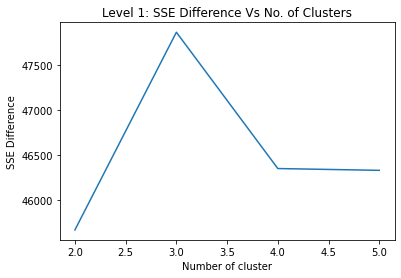

{1: '5.51397e+06', 2: '5.4683e+06', 3: '5.42044e+06', 4: '5.37409e+06', 5: '5.32776e+06'}


In [119]:
import subprocess

sse = {}
for ei, k in enumerate(range(1, 6)):
    bashCommand = f'/Users/pawnesh/ws/regularized-k-means/build/regularized-k-means "hard" "indoor_feature_out/indoor_1000.csv" {k} -s42 -r 1 -l 0.005 -a "indoor_cluster_out/out" -o "indoor_cluster_out/logs.txt"'
    process = subprocess.Popen(bashCommand, stdout=subprocess.PIPE, universal_newlines=True, shell=True )
    output, error = process.communicate(timeout=None)
    with open("indoor_cluster_out/logs.txt", "r") as f:
        sse_value = f.readlines()[-1].split(",")[-2]
    sse[k] = sse_value 
    bashCommand = f'rm "indoor_cluster_out/logs.txt"'
    process = subprocess.Popen(bashCommand, stdout=subprocess.PIPE, universal_newlines=True, shell=True )


sse_values = [float(i) for i in sse.values()]
sse_diff_values = np.absolute(np.array(sse_values[1:]) - np.array(sse_values[:-1])).tolist()
sse_diff_values =  sse_diff_values

plt.figure()
plt.title("Level 1: SSE Difference Vs No. of Clusters")
plt.plot(list(sse.keys())[1:], sse_diff_values)
plt.xlabel("Number of cluster")
plt.ylabel("SSE Difference")
plt.show()
print(sse)

In [112]:
bashCommand = f'/Users/pawnesh/ws/regularized-k-means/build/regularized-k-means "hard" "indoor_feature_out/indoor_1000.csv" 3 -s42 -r 1 -l 0.005 -a "indoor_cluster_out/l1_out" -o "indoor_cluster_out/logs.txt"'
process = subprocess.Popen(bashCommand, stdout=subprocess.PIPE, universal_newlines=True, shell=True )
output, error = process.communicate(timeout=None)

Sum of Squares: 5.42044e+06
Used Time: 0.00109167


In [113]:
l1_label_df = pd.read_csv("indoor_cluster_out/l1_out.csv", sep=";")


In [114]:
l1_label = l1_label_df.to_numpy().reshape(-1).tolist()
print(l1_label)

[2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 1, 2, 1, 2, 1, 0, 0, 0, 1, 0, 2, 2, 0, 2, 2, 2, 2, 0, 1, 1, 0, 1, 2, 2, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 2, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0, 0, 2, 0, 1, 0, 1, 0, 0, 2, 1, 2, 1, 1, 2, 0, 1, 2, 0, 0, 1, 0, 2, 2, 1, 2, 1, 2, 1, 0, 0, 1, 1, 2, 0, 1, 1, 0, 2, 1, 1, 1, 2, 2, 2, 2, 1, 0, 1, 0, 1, 0, 2, 2, 2, 2, 2, 0]


In [115]:
print(INDOOR_CLASSES_INDX)

['62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155', '156', '157', '158', '159', '160', '161', '162', '163', '164', '165', '166', '167', '168', '169', '170', '171', '172', '173', '174', '175', '176', '177', '178', '179', '183', '186', '187', '188']


In [116]:
groups_w_name = defaultdict(list)
groups_w_id = defaultdict(list)
for class_id, label_id in zip(INDOOR_CLASSES_INDX, l1_label):
    groups_w_name[label_id].append(CLASSES[int(class_id)])
    groups_w_id[label_id].append(int(class_id))

In [120]:
print(groups_w_name)

defaultdict(<class 'list'>, {2: ['floor', 'ceiling', 'window', 'cabinet', 'door', 'chair', 'picture', 'shelf', 'House', 'mirror', 'Field', 'bathtub', 'cushion', 'Box', 'Column', 'drawers', 'counter', 'path', 'stairs', 'Palm-tree', 'computer', 'Television', 'poster', 'fountain', 'washer', 'stool', 'Cradle', 'oven', 'food', 'tank', 'screen-projector', 'vase', 'CRT-screen', 'plate', 'monitor', 'shower', 'Shower curtain', 'Otherfurniture', 'Tree', 'Plane', 'Earth-ground'], 0: ['bed', 'table', 'curtain', 'Sofa', 'Seat', 'Desk', 'Rock', 'lamp', 'Base', 'sink', 'refrigerator', 'Pool-billiard', 'river', 'coffee table', 'flower', 'book', 'hill', 'countertop', 'bar', 'Arcade-machine', 'light', 'chandelier', 'Awning-sunshade', 'Track', 'bannister', 'bottle', 'buffet', 'playing-toy', 'basket', 'waterfall', 'bag', 'microwave', 'pot', 'blanket-cover', 'sconce', 'glass-drinking', 'flag', 'Plant', 'Soil-ground'], 1: ['Sea', 'Rug', 'Armchair', 'Wardrobe', 'skyscraper', 'fireplace', 'grandstand', 'runwa